## Entregable nº2 - MODELO

Importamos librerias

In [7]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns',100)   # para visualizar mas columnas en un df
pd.set_option('display.max_rows',100)

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score



In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
PATH= '/content/drive/MyDrive/DSC1122 –Entregable 2-Borrajo_Stocco_Vidondo/'

#### Importamos el clean data que hemos preprocesado en el notebook anterior

In [10]:
df= pd.read_pickle(PATH + 'clean_data')

In [11]:
df.head()

,rev,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3qty,...,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_Y,refurb_new_R,hnd_webcap_WC,ownrent_R,dwlltype_M,marital_A,marital_B,marital_M,marital_S,marital_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,42.333333,0.0,0.000000,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,1,61,2,1,1453.44,4085.00,1602,29.66,83.37,32.69,116,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,57.4925,482.75,37.425,0.2475,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,69.000000,0.0,1.666667,6.333333,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,0,56,1,1,2833.88,26367.00,14624,51.53,479.40,265.89,158,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.9900,10.25,16.990,0.0000,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,1,58,1,1,1934.47,24303.05,7888,34.54,433.98,140.86,7,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,38.0000,7.50,38.000,0.0000,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.333333,0.0,0.000000,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,0,60,1,1,1941.81,3035.00,1479,40.45,63.23,30.81,3,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,94.666667,0.0,8.666667,15.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,0,57,1,1,2166.48,13965.00,4452,38.69,249.38,79.50,191,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Split X-y

In [12]:
target = 'churn'
features = [i for i in df.columns if i != target]

In [13]:
y= df[target]
X= df[features]

#### Distribución del target

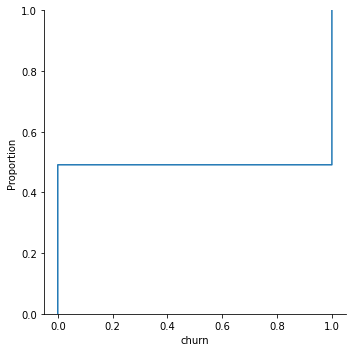

In [14]:
sns.displot(df['churn'], kind='ecdf')

No hace falta hacer undersampling, porque los datos del target están balanceados.

# Split TRAIN-TEST data

El dataset se compone de 90.000 observaciones por lo que se puede considerar de tamaño mediano y nos permitirá reservar un 20% para el test.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 72000
Test set size: 18000


# Rescaling
Principalmente se aplicarán modelos de arboles de decisión pero como también se aplicará  Logistic Regression, se reescalan los datos para este modelo.

In [17]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) 
X_train_std = pd.DataFrame(data = X_train_std, columns=X_train.columns, index=X_train.index)

In [18]:
y_train.shape

(72000,)

In [19]:
pickle.dump(scaler,file=open(PATH + 'scaler.pkl','wb'))

# TRAIN-VALIDATION

## Model Competition
Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

Como se trata de un modelo de clasificación el objetivo es conseguir el máximo AUC Score posible

In [20]:
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, X, y, 
                              cv=4,                 # k-folds 
                              scoring='roc_auc'     # scoring basado en AUC Score (maximizar)
                              )    
  return cross_val.mean()

In [21]:
label_, auc_train_ , auc_valida_ = [], [], []

def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Probamos con diferentes modelos, y evaluamos el AUC Score en train y en cross-validation. 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [23]:
#En este modelo se usa el dataset de train escalado.
evaluate_classification(model = LogisticRegression(), 
                        X = X_train_std, 
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.630444,0.62599


In [24]:
evaluate_classification(model = AdaBoostClassifier(), X = X_train, y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,AdaBoostClassifier(),0.664417,0.657137
0,LogisticRegression(),0.630444,0.625990


In [25]:
evaluate_classification(model = GradientBoostingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,GradientBoostingClassifier(),0.688701,0.670201
1,AdaBoostClassifier(),0.664417,0.657137
0,LogisticRegression(),0.630444,0.625990


In [26]:
evaluate_classification(model = HistGradientBoostingClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,HistGradientBoostingClassifier(),0.746807,0.680119
2,GradientBoostingClassifier(),0.688701,0.670201
1,AdaBoostClassifier(),0.664417,0.657137
0,LogisticRegression(),0.630444,0.625990


In [27]:
evaluate_classification(model = XGBClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,HistGradientBoostingClassifier(),0.746807,0.680119
2,GradientBoostingClassifier(),0.688701,0.670201
4,"XGBClassifier(base_score=None, booster=None, c...",0.847934,0.666281
1,AdaBoostClassifier(),0.664417,0.657137
0,LogisticRegression(),0.630444,0.625990


In [28]:
evaluate_classification(model = BaggingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,HistGradientBoostingClassifier(),0.746807,0.680119
2,GradientBoostingClassifier(),0.688701,0.670201
4,"XGBClassifier(base_score=None, booster=None, c...",0.847934,0.666281
1,AdaBoostClassifier(),0.664417,0.657137
0,LogisticRegression(),0.630444,0.625990
5,BaggingClassifier(),0.999109,0.612494


In [29]:
evaluate_classification(model = RandomForestClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,HistGradientBoostingClassifier(),0.746807,0.680119
2,GradientBoostingClassifier(),0.688701,0.670201
4,"XGBClassifier(base_score=None, booster=None, c...",0.847934,0.666281
6,RandomForestClassifier(),1.000000,0.657661
1,AdaBoostClassifier(),0.664417,0.657137
0,LogisticRegression(),0.630444,0.625990
5,BaggingClassifier(),0.999109,0.612494


## Hyperparameter tuning

Probamos diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos, en este caso HistGradientBoosting

Este modelo nos ha generado un buen resultado en la validación pero con diferencia respecto a los de Train (resultados mejores). Esto significa que el modelo ha hecho overfit (se ajusta en exceso a los datos del train).\
Enfocaremos la hiperparametrización en intentar reducir el overfit

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Para reducir el overfitting las estrategias mas usuales son: incluir l2_regularization, delimitar la profundidad con max_depth, limitar el n_iteraciones y minimizar el max_bins.
parameters_hgb = {
    'loss': ['log_loss', 'auto'], 
    'learning_rate': [0.01,0.05,0.1,0.5,0.7,1],  #default: 0.1
    'l2_regularization': [1,0.5,0,1.5,2,2.5,3],
    'max_depth':[1,2],
    'max_iter':[100,150,200],  
    'max_leaf_nodes': [5,10], 
    'min_samples_leaf': [0,5,10,25],
    'max_bins': [25,30]
}

In [32]:
search_hgb = RandomizedSearchCV(estimator = HistGradientBoostingClassifier(), 
                               param_distributions = parameters_hgb,
                               scoring = 'roc_auc',                         # metrica a optimizar: AUC
                               cv = 4,                                      # numero de folds para cross-validation
                               n_iter = 20,                                 # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1, 
                               verbose=True)

In [33]:
search_hgb.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=HistGradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [1, 0.5, 0, 1.5, 2,
                                                              2.5, 3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          0.7, 1],
                                        'loss': ['log_loss', 'auto'],
                                        'max_bins': [25, 30],
                                        'max_depth': [1, 2],
                                        'max_iter': [100, 150, 200],
                                        'max_leaf_nodes': [5, 10],
                                        'min_samples_leaf': [0, 5, 10, 25]},
                   scoring='roc_auc', verbose=True)

In [34]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hgb.best_estimator_)
print("\n The best AUC:", search_hgb.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hgb.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: HistGradientBoostingClassifier(l2_regularization=2.5, learning_rate=0.7,
                               loss='auto', max_bins=25, max_depth=2,
                               max_iter=150, max_leaf_nodes=10,
                               min_samples_leaf=25)

 The best AUC: 0.6684496357005646

 The best parameters across ALL searched params:
 {'min_samples_leaf': 25, 'max_leaf_nodes': 10, 'max_iter': 150, 'max_depth': 2, 'max_bins': 25, 'loss': 'auto', 'learning_rate': 0.7, 'l2_regularization': 2.5}


## Select best model

In [35]:
best_model = search_hgb.best_estimator_

In [36]:
print('AUC Train:', auc(best_model, X_train, y_train))

AUC Train: 0.6880335233047017


In [37]:
print('AUC CV:', auc_cross_validation(best_model, X_train, y_train))

AUC CV: 0.6690440618273281


In [38]:
#Save model
pickle.dump(best_model, file=open(PATH + 'model.pkl','wb'))

# TEST

* Evaluación de las métricas de performance en TEST.
  * Clasificación: AUC, ROC curve, F1-score, Accuracy, Precision, Recall.

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
y_train_pred = best_model.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = best_model.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [41]:
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

- Empezamos evaluando el TEST con el AUC Score

In [42]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST

In [43]:
print('AUC Train:', round(auc_train,6))
print('AUC Test:', round(auc_test,6))

AUC Train: 0.688034
AUC Test: 0.667482


- Tenemos el valor del AUC Score para train y para test, para poder observar este resultado gráficamente realizaremos las curvas ROC

In [44]:
from sklearn.metrics import roc_curve

In [45]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba) #False positive rate, true positive rate train
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba) #False positive rate, true positive rate test

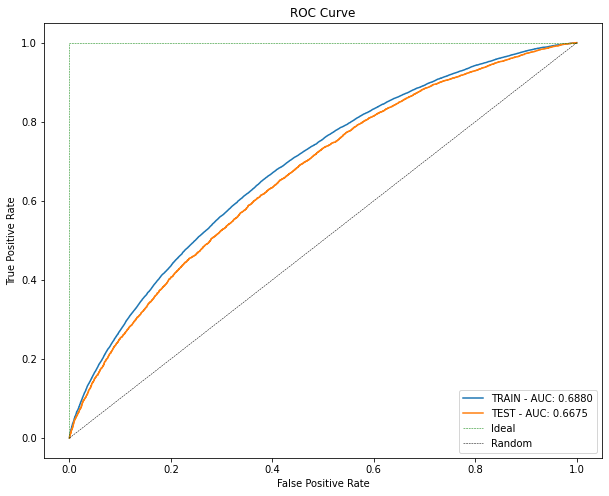

In [46]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

En la Curva ROC se observa que una vez hiperparametrizado el modelo, se ha reducido el overfitting.

- Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

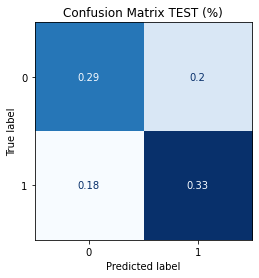

In [49]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

En la Confusion Matrix observamos:

- True Negative (29%): en el 29% de las predicciones, ha predecido que no había churn correctamente.
- True Positive (33%): en el 33% de las predicciones, ha predecido que había churn correctamente.
- False Positive (20%): en el 20% de las predicciones, ha predecido que había churn cuando realmente no lo había. 
- False Negative (18%): en el 18% de las predicciones, ha predecido que no había churn cuando realmente lo había.

En este caso el porcentaje menor (18%) se da en el caso en el que habría que focalizarse (cuando el cliente se va de la compañia y no lo habiamos predecido).

- Accuracy, Precision, Recall y F1-Score

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.6182
Precision: 0.6199
Recall: 0.6471
F1-score: 0.6332


# Interpretability / Explainability

HistGradientBoosting es un model de árbol de decisiones por lo que se puede explicar con SHAP values y plot del árbol de decisión.

In [54]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.2 MB/s eta 0:00:00


In [55]:
import shap

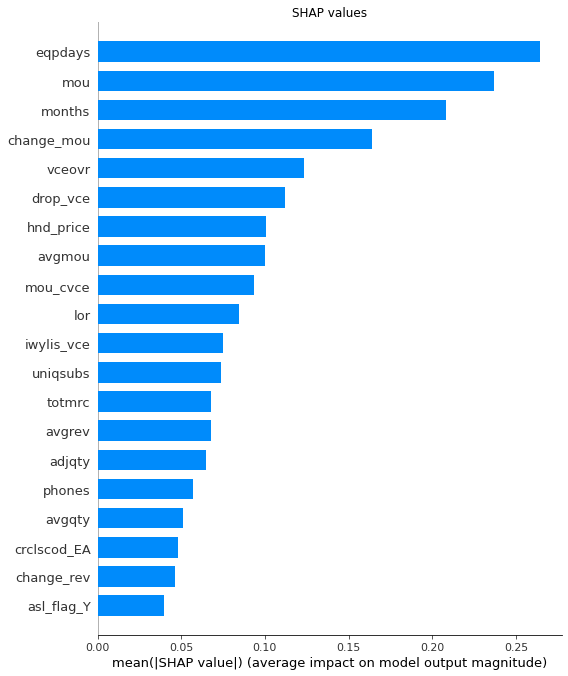

In [56]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

En la gráfica anterior podemos observar que las variables que más relevancia tiene en el modelo de reglas son:
- eqpdays (Number of days (age) of current equipment)
- mou (Mean number of monthly minutes of use) 
- months (Total number of months in service)
- change_mou (Percentage change in monthly minutes of use vs previous three month average)
- vceovr (Mean revenue of voice overage).

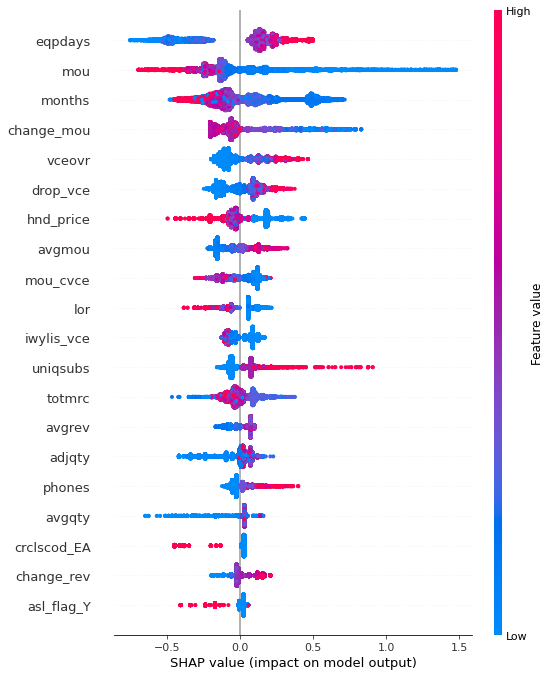

In [61]:
shap.summary_plot(shap_values, X_test)

Summary SHAP Values:\
1- **Eqpdays**: 
- Cuanto más antiguo es el equipamiento (equipment) más posibilidades de que el cliente haga churn.
- Impacto muy alto (shap value cercana a -1) de tener un equipamiento muy nuevo para no hacer churn.

2- **Mou**: 
- Cuanto más minutos consume de media al mes el cliente menos posibilidades de que haga churn. Impacto muy alto, ya que los valores más altos tiene un shap value entre -0.5 y -1.


3- **Months**: 
- Cuantos más meses lleve en servicio el cliente menos posibilidades de que haga churn.
- Cuando el cliente lleva pocos meses en el servicio alta posibilidad de churn.

4- **Change_mou**: 
- Cuanto más se incrementa el consumo en los tres últimos meses menos posibilidad de que el cliente no haga churn. 

5- **vceovr**: 
- Cuando los ingresos medios por uso de consumo de voz son altos, hay un impacto importante en que el cliente haga churn.

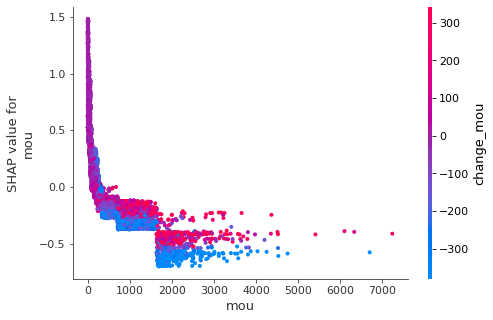

In [58]:
shap.dependence_plot('mou',shap_values,X_test)

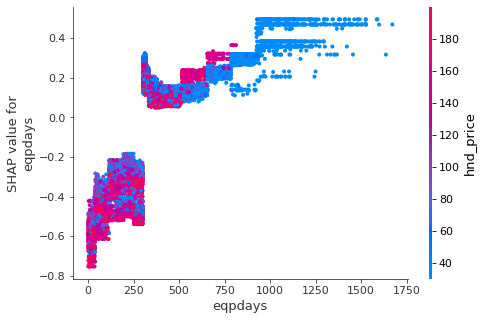

In [59]:
shap.dependence_plot('eqpdays',shap_values,X_test)

Se observa un cambio importante a partir de llevar un año con el mismo equipment. Cuando sobrepasa el año los clientes tienen tendencia a hacer churn, más elevado cuanto más antiguo es el equipamiento. 

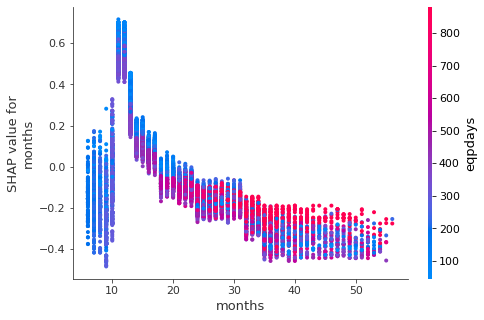

In [60]:
shap.dependence_plot('months',shap_values,X_test)